In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
file_path = "portfolio_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
print(data.head())

                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285


In [45]:
print(data.isnull().sum())

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


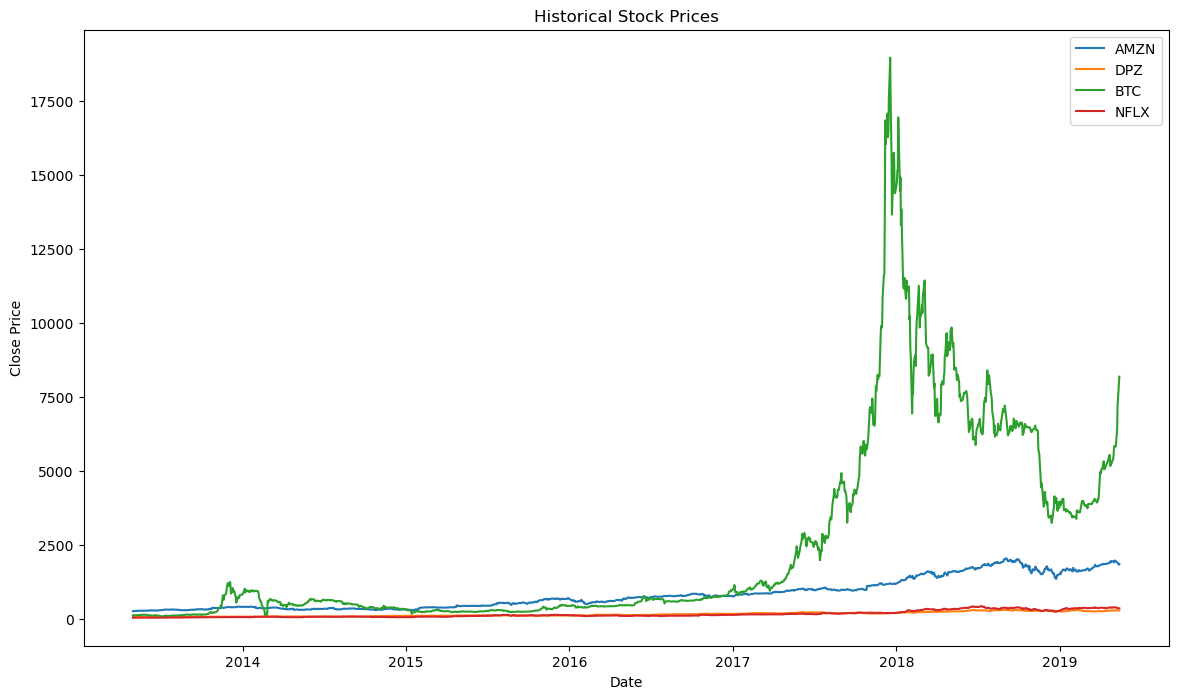

In [46]:
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data[column], label=column)
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

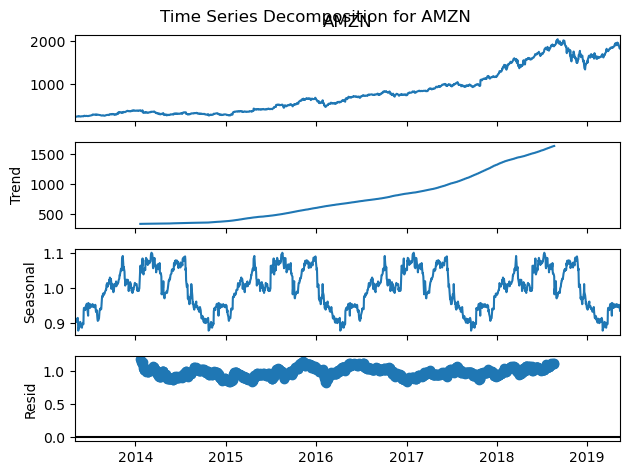

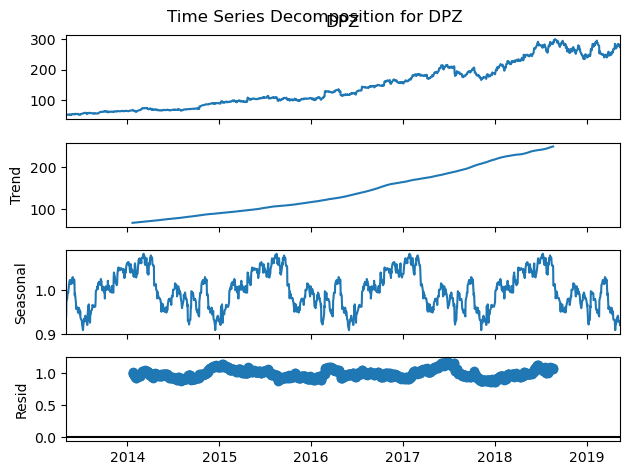

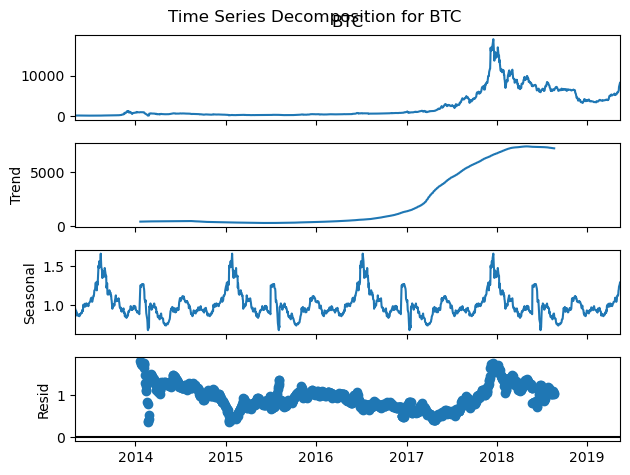

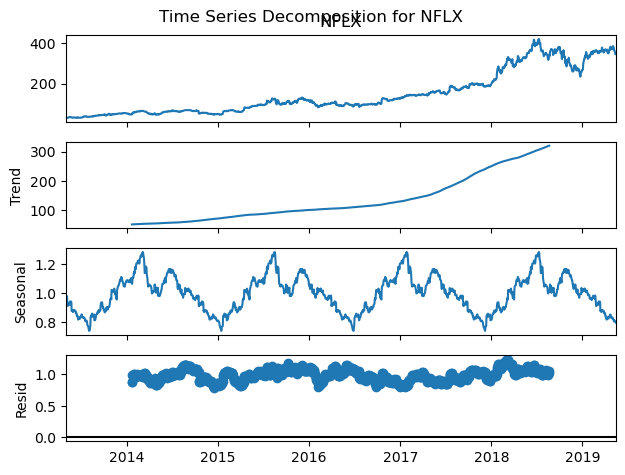

In [47]:
for column in data.columns:
    result = seasonal_decompose(data[column], model='multiplicative', period=365)
    result.plot()
    plt.suptitle(f'Time Series Decomposition for {column}')
    plt.show()

In [48]:
for column in data.columns:
    adf_test = adfuller(data[column])
    print(f'ADF Statistic for {column}: {adf_test[0]}')
    print(f'p-value for {column}: {adf_test[1]}')

ADF Statistic for AMZN: 0.5536599123300191
p-value for AMZN: 0.986415949572589
ADF Statistic for DPZ: -0.2793349606892402
p-value for DPZ: 0.9283805552655594
ADF Statistic for BTC: -1.3230811198913228
p-value for BTC: 0.6185476417504843
ADF Statistic for NFLX: -0.184158193360888
p-value for NFLX: 0.9403837629187616


In [49]:
for column in data.columns:
    if '_diff' not in column:
        data[f'{column}_diff'] = data[column].diff().dropna()
for column in data.columns:
    if '_diff' in column:
        adf_test_diff = adfuller(data[column].dropna())
        print(f'ADF Statistic after differencing for {column}: {adf_test_diff[0]}')
        print(f'p-value after differencing for {column}: {adf_test_diff[1]}')

ADF Statistic after differencing for AMZN_diff: -7.857516189971943
p-value after differencing for AMZN_diff: 5.393028013520397e-12
ADF Statistic after differencing for DPZ_diff: -17.619588941446377
p-value after differencing for DPZ_diff: 3.844412712490696e-30
ADF Statistic after differencing for BTC_diff: -8.68196425522323
p-value after differencing for BTC_diff: 4.262125799425229e-14
ADF Statistic after differencing for NFLX_diff: -8.100616408430511
p-value after differencing for NFLX_diff: 1.3028771226698901e-12


In [50]:
models = {}
for column in data.columns:
    if '_diff' not in column:
        model = ARIMA(data[column], order=(5, 1, 0))
        model_fit = model.fit()
        models[column] = model_fit
        print(f'{column} Model Summary:')
        print(model_fit.summary())

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AMZN Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6604.610
Date:                Mon, 17 Jun 2024   AIC                          13221.219
Time:                        20:59:02   BIC                          13253.174
Sample:                             0   HQIC                         13233.116
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0235      0.012     -1.931      0.053      -0.047       0.000
ar.L2         -0.0386      0.011     -3.490      0.000      -0.060      -0.017
ar.L3         -0.0146      0.013

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

                               SARIMAX Results                                
Dep. Variable:                    BTC   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10545.833
Date:                Mon, 17 Jun 2024   AIC                          21103.666
Time:                        20:59:02   BIC                          21135.621
Sample:                             0   HQIC                         21115.563
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0297      0.007     -4.035      0.000      -0.044      -0.015
ar.L2          0.0837      0.009      9.472      0.000       0.066       0.101
ar.L3          0.0897      0.010      8.867      0.0

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


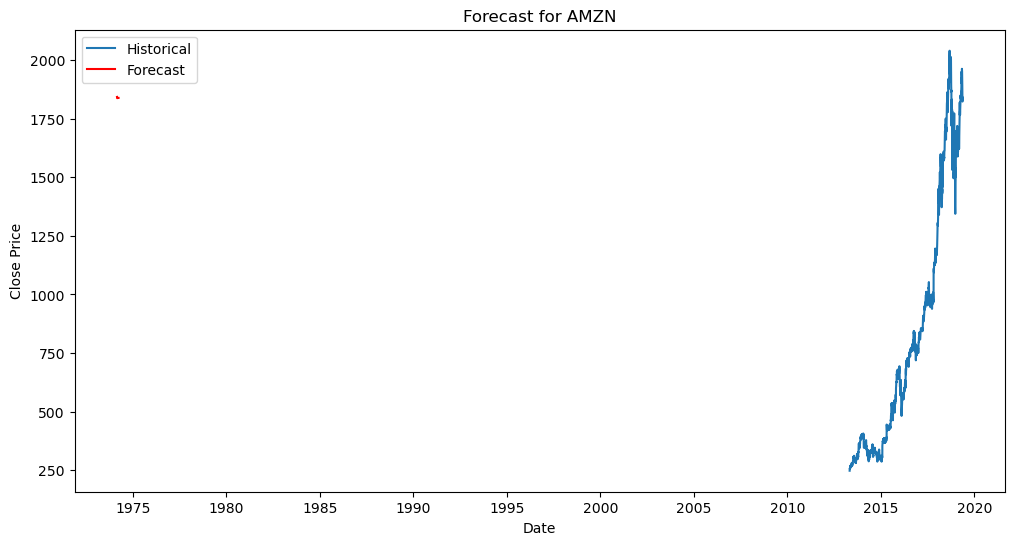

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


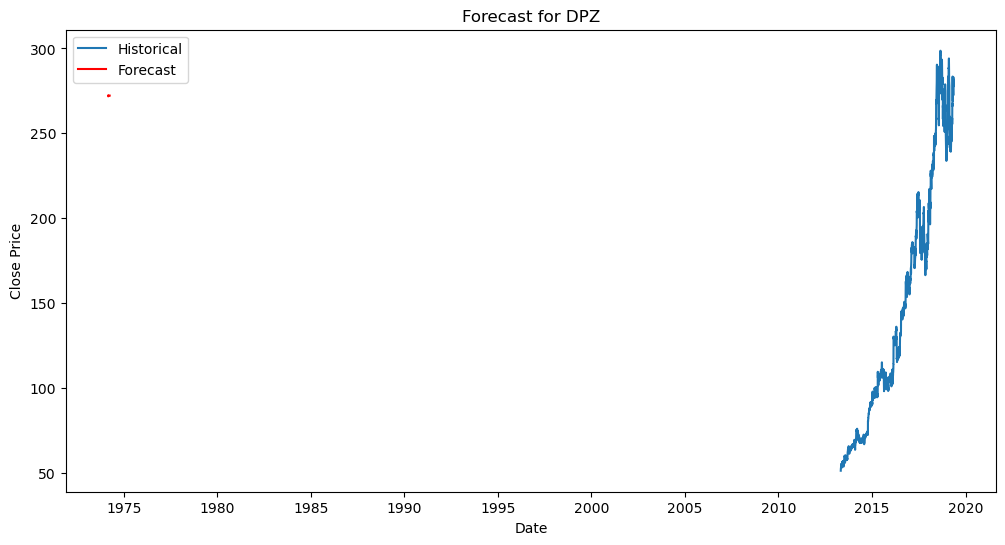

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


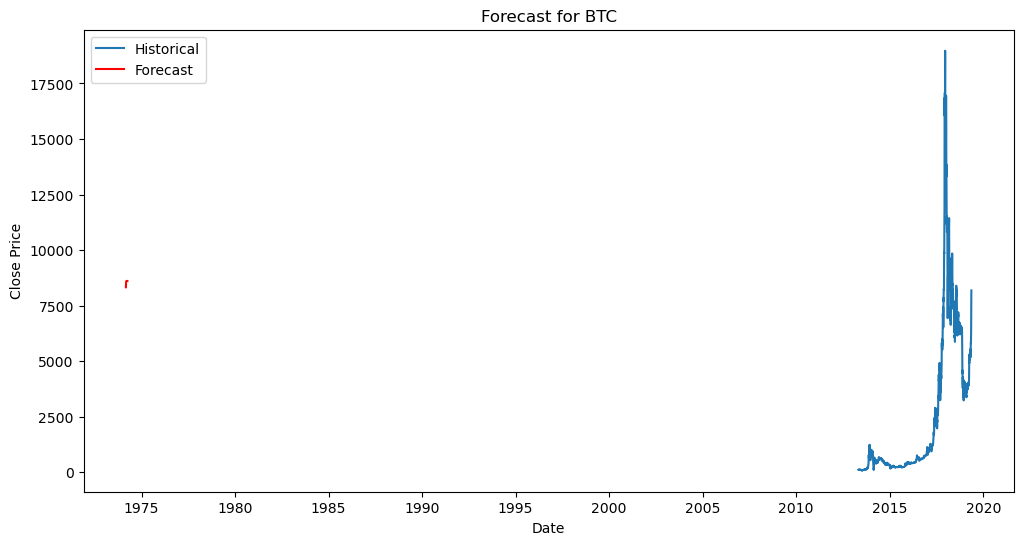

/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


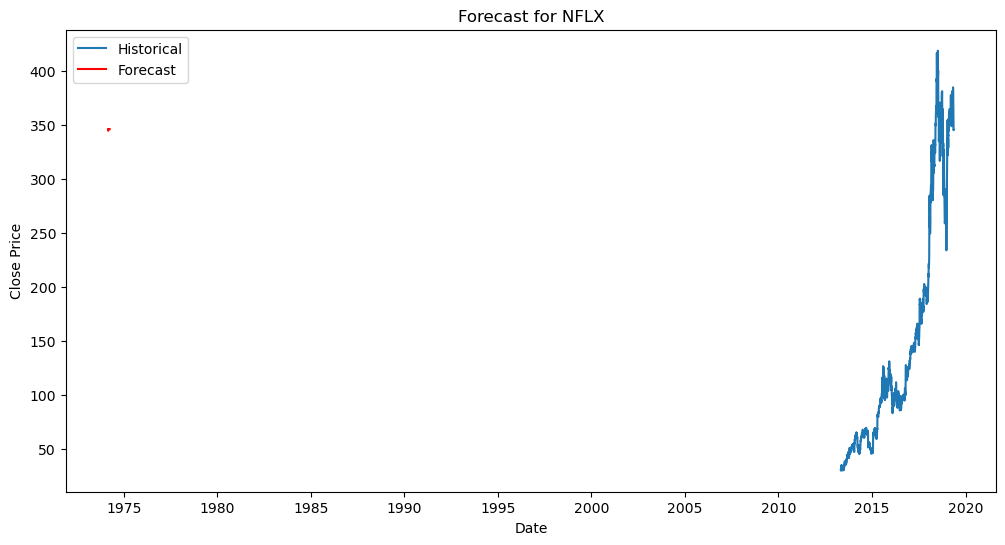

In [51]:
forecast_period = 30
forecasts = {}
for column, model_fit in models.items():
    forecast = model_fit.forecast(steps=forecast_period)
    forecasts[column] = forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label='Historical')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(f'Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

In [52]:
for column in data.columns:
    if '_diff' not in column:
        y_true = data[column][-forecast_period:]  
        y_pred = forecasts[column][:forecast_period] 
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        print(f'MAE for {column}: {mae}')
        print(f'MSE for {column}: {mse}')

MAE for AMZN: 47.16899333227198
MSE for AMZN: 3646.461987512507
MAE for DPZ: 10.529769200829758
MSE for DPZ: 177.09773377710624
MAE for BTC: 2953.5967215810856
MSE for BTC: 9351646.686736763
MAE for NFLX: 20.3751623575076
MSE for NFLX: 514.7790059302342



Insights for AMZN:
Mean Price: 821.5418097875
Standard Deviation: 518.4426534119235
Recent Trend (Last 30 days): 1879.7609985333333
Average Seasonal Effect (by month):
Date
1     0.996312
2     0.998461
3     0.993365
4     0.991288
5     0.989598
6     1.007185
7     1.012870
8     0.993583
9     0.988149
10    0.990560
11    1.007684
12    0.996936
Name: seasonal, dtype: float64
Forecast Mean Absolute Error (MAE): 47.16899333227198
Forecast Mean Squared Error (MSE): 3646.461987512507

Insights for DPZ:
Mean Price: 146.7716948388158
Standard Deviation: 72.19228694375192
Recent Trend (Last 30 days): 266.35566553333337
Average Seasonal Effect (by month):
Date
1     1.003025
2     1.006113
3     1.011697
4     1.001461
5     0.993190
6     0.994360
7     0.997009
8     1.003767
9     1.000760
10    0.989843
11    0.992717
12    0.992083
Name: seasonal, dtype: float64
Forecast Mean Absolute Error (MAE): 10.529769200829758
Forecast Mean Squared Error (MSE): 177.09773377710624

Insights fo

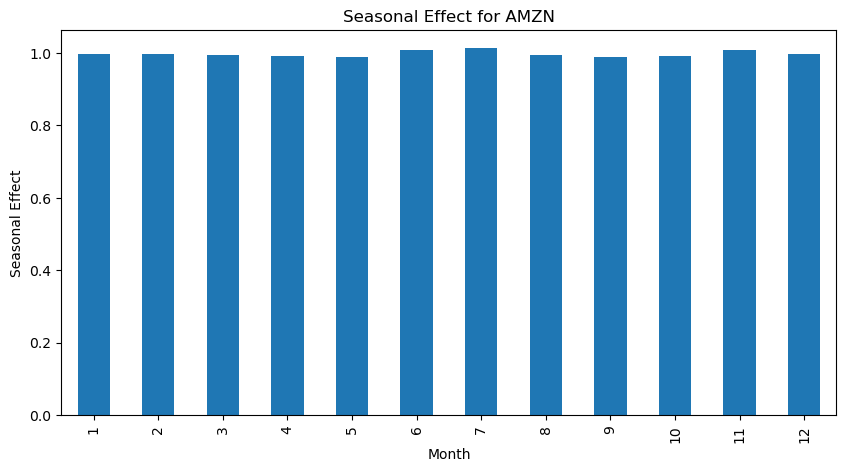

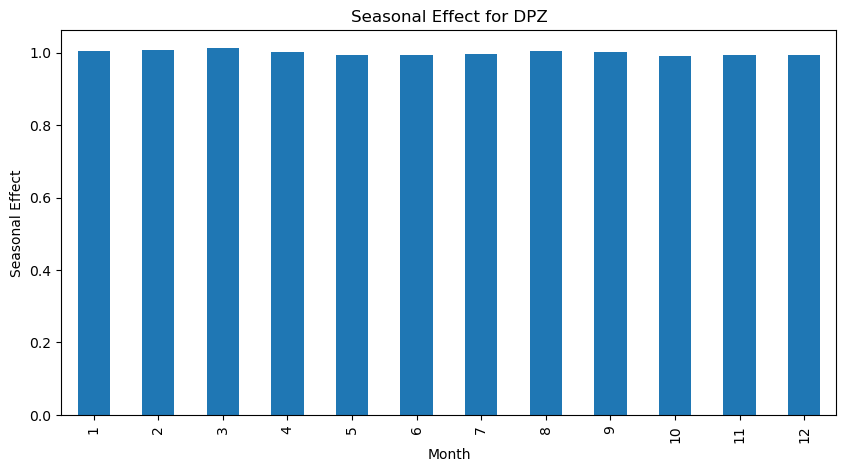

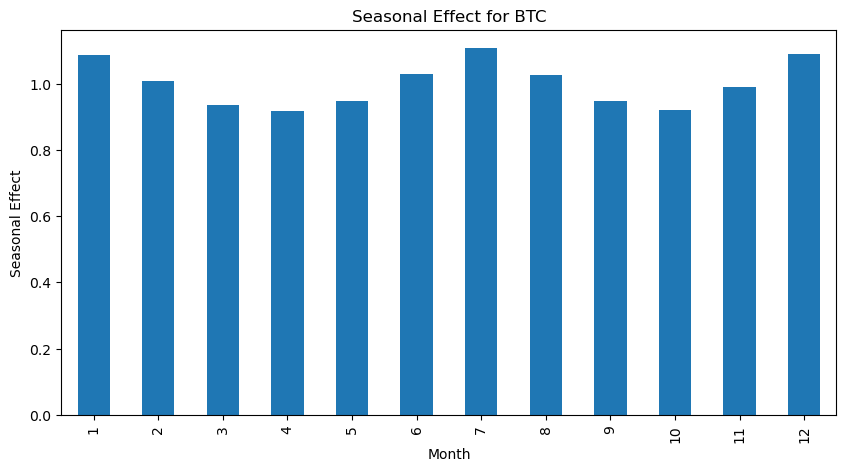

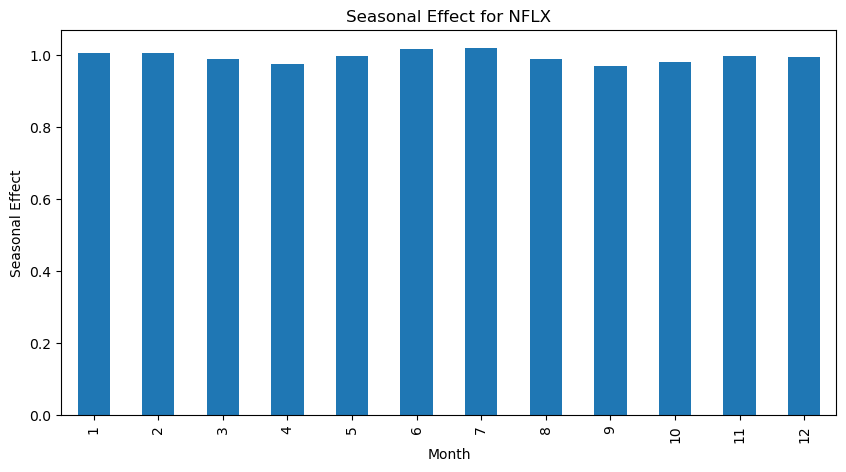

In [53]:
insights = {}
for column in data.columns:
    if '_diff' not in column:
        mean_price = data[column].mean()
        std_price = data[column].std()
        recent_trend = data[column][-30:].mean()
        seasonal_decompose_result = seasonal_decompose(data[column], model='multiplicative', period=365)
        seasonal_component = seasonal_decompose_result.seasonal
        avg_seasonal_effect = seasonal_component.groupby(seasonal_component.index.month).mean()
        y_true = data[column][-30:]
        y_pred = forecasts[column][:30]

        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        insights[column] = {
            'Mean Price': mean_price,
            'Standard Deviation': std_price,
            'Recent Trend (Last 30 days)': recent_trend,
            'Seasonal Effect': avg_seasonal_effect,
            'Forecast MAE': mae,
            'Forecast MSE': mse
        }
for company, metrics in insights.items():
    print(f"\nInsights for {company}:")
    print(f"Mean Price: {metrics['Mean Price']}")
    print(f"Standard Deviation: {metrics['Standard Deviation']}")
    print(f"Recent Trend (Last 30 days): {metrics['Recent Trend (Last 30 days)']}")
    print("Average Seasonal Effect (by month):")
    print(metrics['Seasonal Effect'])
    print(f"Forecast Mean Absolute Error (MAE): {metrics['Forecast MAE']}")
    print(f"Forecast Mean Squared Error (MSE): {metrics['Forecast MSE']}")
for company, metrics in insights.items():
    plt.figure(figsize=(10, 5))
    metrics['Seasonal Effect'].plot(kind='bar')
    plt.title(f'Seasonal Effect for {company}')
    plt.xlabel('Month')
    plt.ylabel('Seasonal Effect')
    plt.show()